# Homework 3 - Ames Housing Dataset

In [0]:
from google.colab import drive
drive.mount('/content/drives')

Mounted at /content/drives


In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from IPython.display import Image
import statsmodels.api as sm
from sklearn import ensemble
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import permutation_test_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
%matplotlib inline
encoder=LabelEncoder()

In [0]:
pd.set_option('display.max_rows',None)

In [0]:
'''Importing Data files'''
full_df=pd.read_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/train.csv')
original_df=full_df.copy()
fullTestData_df=pd.read_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/test.csv')

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
'''PreProcessing'''
#Columns with nan values
columnswithNAN=full_df.columns[full_df.isna().any()].tolist()
##testfile##
columnswithNAN_test=fullTestData_df.columns[fullTestData_df.isna().any()].tolist()
#columns where nan values not to be replaced with generic 'not present' 
nan_notTobeReplaced=['LotFrontage','GarageYrBlt','MasVnrArea']
nan_notTobeReplacedInTestFile=['LotFrontage','GarageYrBlt','MasVnrArea','BsmtFinSF1','BsmtUnfSF','BsmtFinSF2','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars']
#############################columns where nan to be replaced by generic 'not present'#################################
columns_replacedNAN=[item for item in columnswithNAN if item not in nan_notTobeReplaced]
full_df[columns_replacedNAN]=full_df[columns_replacedNAN].replace(np.nan, 'not present', regex=True)
##test file ##
fullTestData_df[columnswithNAN_test]=fullTestData_df[columnswithNAN_test].replace(np.nan, 'not present', regex=True)
lst=['MasVnrArea','GarageYrBlt','LotFrontage']
full_df[lst]=full_df[lst].replace(np.nan,-999,regex=True)
##Test file##
fullTestData_df[nan_notTobeReplacedInTestFile]=fullTestData_df[nan_notTobeReplacedInTestFile].replace(np.nan,-999,regex=True)
dataFrame_forPlots=full_df.copy()

In [0]:
#Label Encoding
#getting non numeric columns
columns_nonNumeric=full_df.select_dtypes(exclude=[np.number]).columns.tolist()
#encoding each column
for col in columns_nonNumeric:
  full_df[col]=encoder.fit_transform(full_df[col].astype('str'))  
columns_nonNumeric_test=fullTestData_df.select_dtypes(exclude=[np.number]).columns.tolist()
#######test file##########
for col in columns_nonNumeric_test:
  fullTestData_df[col]=encoder.fit_transform(fullTestData_df[col].astype('str'))

full_df.LotFrontage = full_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
full_df.GarageYrBlt = full_df.groupby('Neighborhood')['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))
full_df.MasVnrArea = full_df.groupby('Neighborhood')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

## Part 1 - Pairwise Correlations

In [0]:
#Features to be extracted from original data frame for correlation analysis
interesting_features=['TotRmsAbvGrd','TotalBsmtSF','GarageArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','SalePrice','LotFrontage','MSSubClass',
                      'YearBuilt','OverallQual','MSZoning','GarageYrBlt','BldgType','Neighborhood','OverallCond']
#extracting the above features from original data frame
interesting_df=full_df.filter(interesting_features)
#correlation matrix
interesting_df.corr(method='pearson')

,TotRmsAbvGrd,TotalBsmtSF,GarageArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,SalePrice,LotFrontage,MSSubClass,YearBuilt,OverallQual,MSZoning,GarageYrBlt,BldgType,Neighborhood,OverallCond
TotRmsAbvGrd,1.000000,0.285573,0.337822,0.409516,0.616423,0.676620,0.533723,0.040498,0.040380,0.095589,0.427452,-0.043200,0.093182,-0.198413,0.106580,-0.057583
TotalBsmtSF,0.285573,1.000000,0.486665,0.819530,-0.174512,0.050450,0.613581,0.029147,-0.238518,0.391452,0.537808,-0.087834,0.170962,-0.050033,0.147762,-0.171098
GarageArea,0.337822,0.486665,1.000000,0.489782,0.138347,0.065253,0.623431,0.012036,-0.098672,0.478954,0.562022,-0.189250,0.552760,-0.061421,0.213578,-0.151521
1stFlrSF,0.409516,0.819530,0.489782,1.000000,-0.202646,0.127401,0.605852,-0.001005,-0.251758,0.281986,0.476224,-0.055614,0.162739,-0.073688,0.164717,-0.144203
2ndFlrSF,0.616423,-0.174512,0.138347,-0.202646,1.000000,0.502901,0.319334,-0.000627,0.307886,0.010308,0.295493,-0.051481,0.063221,-0.084212,0.028911,0.028942
BedroomAbvGr,0.676620,0.050450,0.065253,0.127401,0.502901,1.000000,0.168213,0.004873,-0.023438,-0.070651,0.101676,-0.016471,-0.008787,-0.277543,0.043033,0.012980
SalePrice,0.533723,0.613581,0.623431,0.605852,0.319334,0.168213,1.000000,0.013948,-0.084284,0.522897,0.790982,-0.166872,0.253221,-0.085591,0.210851,-0.077856
LotFrontage,0.040498,0.029147,0.012036,-0.001005,-0.000627,0.004873,0.013948,1.000000,-0.003920,-0.042629,0.048509,0.015388,-0.052151,0.004500,0.024834,-0.028573
MSSubClass,0.040380,-0.238518,-0.098672,-0.251758,0.307886,-0.023438,-0.084284,-0.003920,1.000000,0.027850,0.032628,0.035900,-0.082484,0.746063,-0.005985,-0.059316
YearBuilt,0.095589,0.391452,0.478954,0.281986,0.010308,-0.070651,0.522897,-0.042629,0.027850,1.000000,0.572323,-0.308908,0.258381,0.217584,0.101289,-0.375983


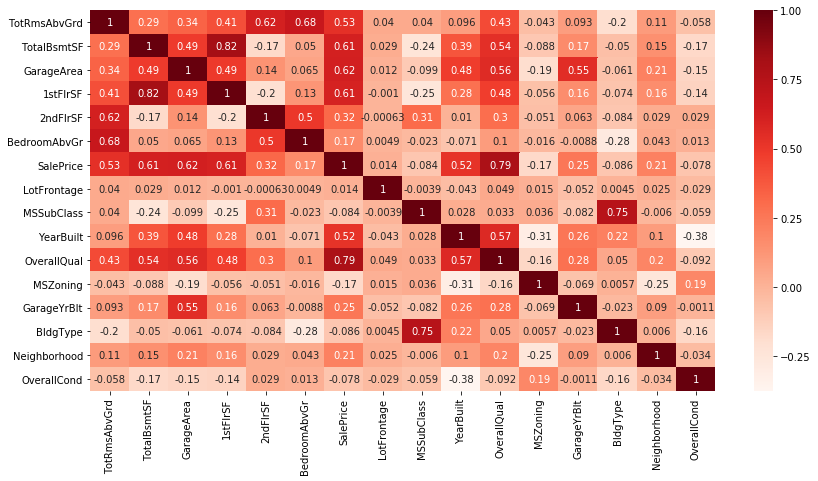

In [0]:
#HeatMap Plot
plt.figure(figsize=(14,7))
heatmap=sns.heatmap(interesting_df.corr(),annot=True,cmap=plt.cm.Reds)
plt.show()

Most Positive Correlation is between the following pairs:

*   TotalBsmtSF vs 1stFlrSF  : r=0.82
*   OverallQual vs SalePrice : r=0.79
*   BldgType vs MSSubClass   : r=0.75
Most negative Correlation is between the following pairs:
*   Loft Frontage vs BldgType:  r=-0.45
*   LoftFrontage vs MsSubClass: r=-0.39
*   MSZoning vs YearBuilt  : r=-0.31
*   MSZoning vs Neighborhood : r=-0.25

> Seeing the correaltion coefficients, it is natural to see higher coefficient value between overall quality and the selling price  





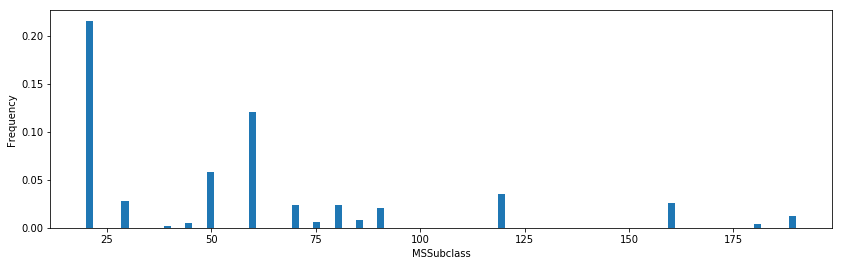

In [0]:
# TODO: show visualization
matplotlib.rcParams['figure.figsize'] = (14.0, 4.0)
plt.hist(full_df.MSSubClass, density=True, bins=100)
plt.ylabel('Frequency');
plt.xlabel('MSSubclass');

## Part 2 - Informative Plots

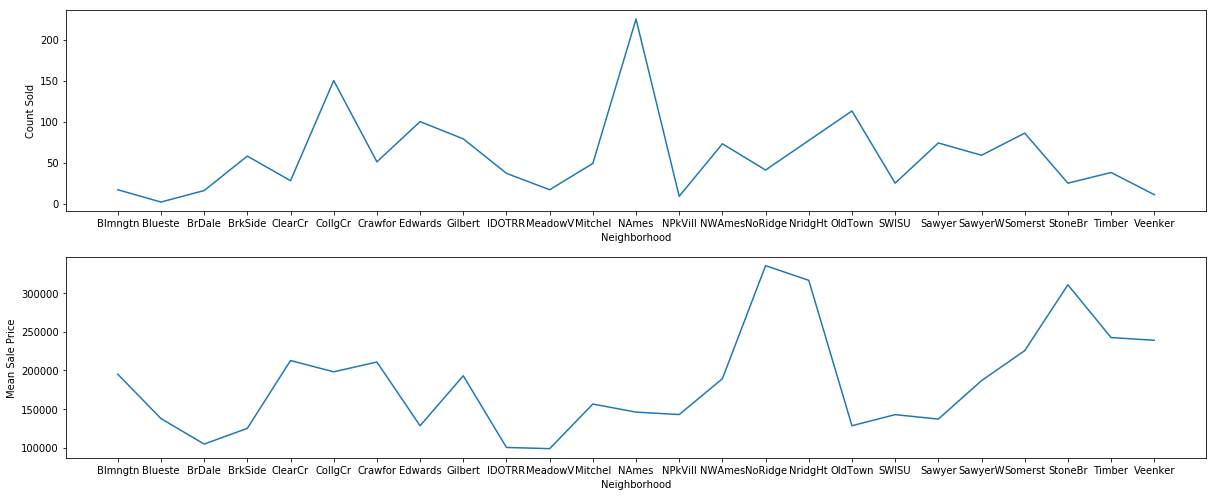

In [0]:
# TODO: code to generate Plot 1
#yearbuilt and saleprice
plt.figure(figsize=(17,7))
plt.subplot(2, 1, 1) 
#Count of sales in each neighborhood
frame=dataFrame_forPlots.groupby('Neighborhood').count().reset_index()
plt.plot(frame['Neighborhood'],frame['SalePrice'])
plt.xlabel("Neighborhood")
plt.ylabel("Count Sold")
plt.tight_layout()
#Mean price vs Neighborhood 
plt.subplot(2, 1, 2) 
frame=dataFrame_forPlots.groupby('Neighborhood').mean().reset_index()
plt.plot(frame['Neighborhood'],frame['SalePrice'])
plt.xlabel("Neighborhood")
plt.ylabel("Mean Sale Price")
plt.tight_layout()

What interesting properties does Plot 1 reveal?


*   Mean Sale Price is the highest in the neighborhood NoRidge followed by NridgHt
*   With the lowest mean price in neighborhoods of IDOTRR and MeadowV
*   However,seeing the first graph(Count sold vs Neighborhood),we can see that neighborhood with highest mean sale price doesn't necessarily correlate with more number of houses sold.
*   It is the NAmes neighborhood with highest number of sales and Blueste with least count of sales.



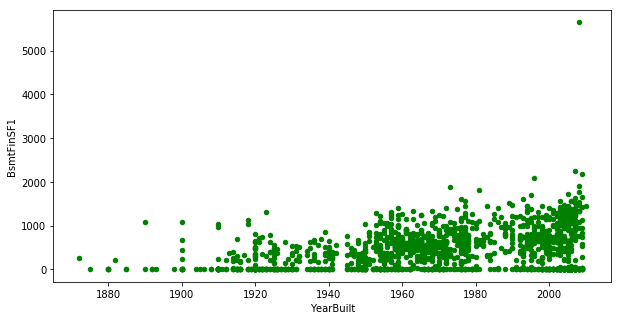

In [0]:
# TODO: code to generate Plot 2
dataFrame_forPlots.plot(kind='scatter',x='YearBuilt',y='BsmtFinSF1',color='green',figsize=(10,5))

What interesting properties does Plot 2 reveal?


> This plot is between Basement area measured in square feet and Year built.It is interesting to see a gradual increase in the area of houses from mid 1950's.But still most of the houses over this period were scattered in areas under 1000 sqfeet  with some between 1000 and 2000 sqFeet.There was one outlier with over 5000sqFeet of basement area. 




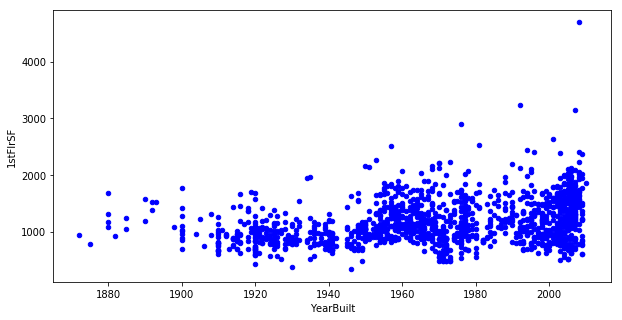

In [0]:
# TODO: code to generate Plot 3
dataFrame_forPlots.plot(kind='scatter',x='YearBuilt',y='1stFlrSF',color='blue',figsize=(10,5))
#year sold  as bar graph

What interesting properties does Plot 3 reveal?


> The trend for 1st floor area over the period from 1880's to 2000 doesn't follow the expected pattern of basement area.The area if much more sparse and can be seen to have an widening open channel pattern with some periods where more houses have lesser area on 1st floor as compared to previous years.There are some periods where either data is missing or no houses had first floor,and the former conclusion seems likely.



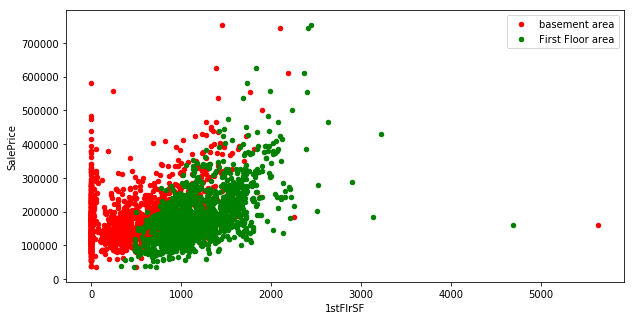

In [0]:
# TODO: code to generate Plot 4
ax=dataFrame_forPlots.plot(kind='scatter',x='BsmtFinSF1',y='SalePrice',color='red',figsize=(10,5),label='basement area')
dataFrame_forPlots.reset_index().plot(kind='scatter',x='1stFlrSF',y='SalePrice',color='green',label='First Floor area',figsize=(10,5),ax=ax)

What interesting properties does Plot 4 reveal?


> The plot between the sale price and 1st floor area seems to folow a linear line with most of the sales under 3000000.The price of houses increases much more steeply as area of the first floor goes above 1800 sqFeet.It also reveals people  houses under 2000 sqFeet first floor areaa and price under 2500000 are more popular amongst the populace.There are some outliers with high area but still low price which seems unlikely seeing just these two features but could be justified if for example,overall condition of house isn't good. 



<function matplotlib.pyplot.tight_layout>

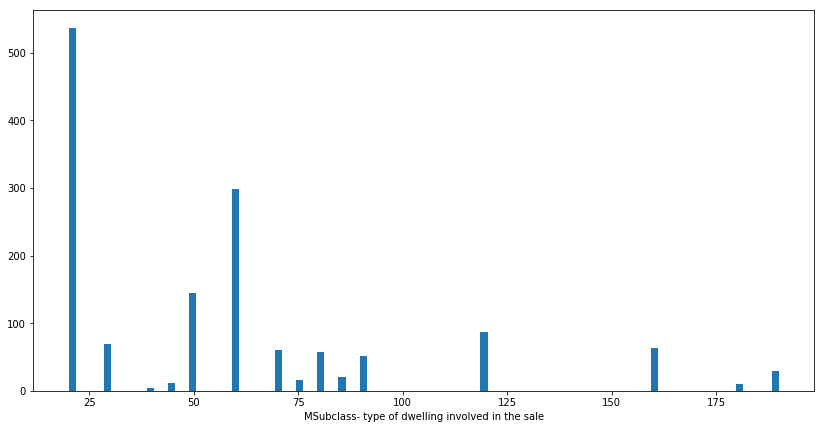

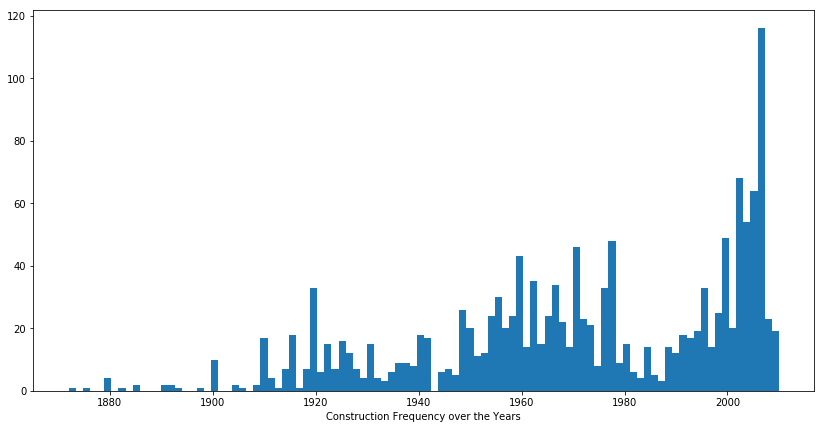

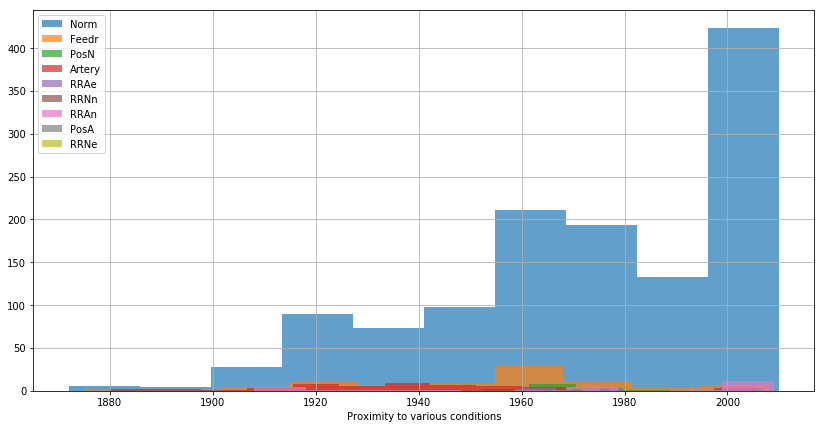

In [0]:
# TODO: code to generate Plot 5
plt.figure(figsize=(14,7))
a=plt.hist(dataFrame_forPlots['MSSubClass'],bins=100)
plt.xlabel('MSubclass- type of dwelling involved in the sale')
plt.figure(figsize=(14,7))
b=plt.hist(dataFrame_forPlots['YearBuilt'],bins=100)
plt.xlabel('Construction Frequency over the Years')
plt.figure(figsize=(14,7))
neigborhood_unique=dataFrame_forPlots.Condition1.unique()
for neighbor in neigborhood_unique:
  a=dataFrame_forPlots[dataFrame_forPlots['Condition1']==neighbor]
  (a.YearBuilt).hist(alpha=0.7,label=neighbor)
plt.legend()
plt.xlabel('Proximity to various conditions')
plt.tight_layout

What interesting properties does Plot 5 reveal?

> MSSubClass identifies the type of dwelling involved in the sale.
From graph it can be seen that 1-STORY 1946 & NEWER ALL STYLES has the maximum frequency.Also overall it can be seen that 2000 era has been where most houses have been built.
Seeing the plot of Condition(Proximity to various conditions) over the years ,it is seent that Normal condition has always been the most common amongst the houses built with it peaking in 2000's.There was period in 1960's where Feedr(Adjacent to feeder street) were the second most frequently built with a wide margin between it nand the third and it being overtaken by Artery type in 2000's for the second position.

## Part 3 - Handcrafted Scoring Function

In [0]:
#features selected for calculating final score
list_ofFeatures_forScoring=['LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','1stFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath'
                           'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','SalePrice','OverallCond']                           
forScoring_df=dataFrame_forPlots.filter(list_ofFeatures_forScoring)
##Assign weight to features##
col_weight_dict={'OverallQual':0.3,'OverallCond':0.05,'YearRemodAdd':0.06,'BsmtFinSF1':0.06,'GrLivArea':0.066,'1stFlrSF':0.067}
#YearBuilt weight based on age ,improve weight if ancient; else reduce
forScoring_df['YearBuilt']=forScoring_df.YearBuilt.apply(lambda x: x*0.1 if (x<1920)  else x*0.066 )
#Apply weights
for col in forScoring_df.columns:
  if col=='YearBuilt':
    continue
  elif col in col_weight_dict:
    w=col_weight_dict.get(col)
    forScoring_df[col]=forScoring_df[col].apply(lambda x:x*w)
  else:
    forScoring_df[col]=forScoring_df[col].apply(lambda x:x*0.045)

In [0]:
#Compute ZScore for all columns 
for col in forScoring_df.columns:
  forScoring_df[col]=(forScoring_df[col] - forScoring_df[col].mean())/forScoring_df[col].std(ddof=0)

In [0]:
#Create column with final scores for each house
forScoring_df['Final_Score']=forScoring_df.sum(axis=1)

In [0]:
#combining Id of houses with scored data frame
forScoring_df.insert(0, 'Id', full_df.Id)

In [0]:
#Presenting Scores vs ID
id_score_df=pd.DataFrame(forScoring_df.Final_Score.sort_values(ascending=False))
id_score_df.head(7)

,Final_Score
1298,45.159308
313,32.320608
1182,30.770147
523,29.963385
691,28.640158
1169,26.497951
769,26.203416


What is the ten most desirable houses?


> Based on the built scoring function the following houses are most desirable in terms of value:




1.   ID number 1298
2.   ID number 313
1.   ID number 1182
1.   ID number 523
2.   ID number 691
6.   ID number 1169
1.   ID number 769
1.   ID number 185
2.   ID number 898
10.  ID number 440












What is the ten least desirable houses?


> Based on the built scoring function the following houses are least desirable in terms of value:




1.   ID number 533
2.   ID number 375
1.   ID number 636
1.   ID number 916
2.   ID number 1100
6.   ID number 393
1.   ID number 1321
1.   ID number 1035
2.   ID number 1325
10.  ID number 1218



Describe your scoring function and how well you think it worked.


> The scoring function did a decent job taking into account the value of a property.It combined multiple features and weighed them with certain values ,positive( if feature added to the value of property) and negative (if feature brought down the value of the property).This value is used as the measure for desirability.The value was  majorly regulated by the "Overall Quality"(positive) and "SalePrice"(negative) features.Increasing salePrice reduced the value of the score.
Data preprocessing is done before calculating the final score.Z-score is calculated for individual columns and then weights are applied to each  of them.Finally score is calculated by linear sum of all the column values in each row.

> All the  features used  by this function are :'LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','1stFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath'                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','SalePrice','OverallCond'

> This scoring function is limited :it uses only numerical value and encoded features.
The weights applied to features are not optimal and can be further optimized based on reinforcement learning or in some other way.





## Part 4 - Pairwise Distance Function

In [0]:
#distance function using Euclidean distance
data_euclidean =full_df.copy()
newdf_euc=pd.DataFrame(squareform(pdist(data_euclidean)))
newdf_euc.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,27052.121673,15263.956630,68512.873849,41913.169446,65751.049490,98527.067799,8814.182152,78642.827842,90513.627372,79056.461532,136547.208188,64678.487057,71062.437047,51584.632402,76551.653281,59590.601071,118534.285943,49790.817487,69515.955974,116952.739626,69122.507933,21669.791646,78721.821543,54531.298728,48196.157181,73723.782872,97560.316451,8074.102179,140027.464481,168503.559826,59185.160192,28769.368276,43073.914682,69024.298128,100634.576672,63567.937020,55516.011168,99508.466082,126569.355849,...,28825.993097,81143.005441,72136.399792,67456.383760,64544.564945,66576.381060,62571.079717,68562.274984,89529.912085,26023.207297,21270.429591,64881.465435,144034.110578,22147.307850,49353.962293,34577.871985,88022.012815,186175.841558,58838.379328,12022.134253,17888.325578,59376.444075,101543.686756,87534.442398,28998.617208,79527.349774,53648.430629,31580.916975,96573.487651,116762.983646,72588.404239,78635.529483,63706.480510,124366.474574,23602.775705,33554.276330,5465.535381,58088.339424,66425.920460,61052.070153
1,27052.121673,0.000000,42052.210108,41523.832410,68676.126827,38783.646863,125504.041672,18601.763787,51741.149775,63540.292532,52027.211793,163524.599370,37673.114512,98020.153193,24566.145790,49640.999557,32574.517049,91524.030413,22876.722689,42554.416739,143890.708140,42174.945406,48542.949241,51881.540686,27577.236083,74967.251397,46774.643409,124517.846885,26863.259426,113059.816381,141512.994135,32216.204184,2572.073094,16044.063606,96029.368982,127576.589196,36545.804657,28530.773649,72521.690928,99622.972125,...,3295.764403,54311.152952,45325.277363,94048.612871,37549.175797,39567.452685,89531.563630,41555.387521,62571.242876,3801.425654,16449.968754,38086.225279,117022.551104,5498.098217,22917.506343,7878.860578,61025.575565,213145.601665,31917.646827,15752.861169,10000.361543,32672.881354,128522.948764,60546.854113,3047.511936,52550.209048,28882.048958,58534.390626,69563.799005,89933.450178,45656.685086,105615.598573,37019.476441,97365.276588,4414.139327,7036.746194,28787.413013,85071.593825,39429.670782,34038.190213
2,15263.956630,42052.210108,0.000000,83518.738837,26679.095018,80558.013959,83524.941083,23553.889382,93743.890686,105577.643628,94008.980284,121505.498608,79537.002898,56029.583070,66520.349668,91654.965801,74520.373295,133510.878036,64556.677672,84588.094842,101850.656512,84196.504150,6991.328772,93871.532964,69588.999540,32988.098839,88803.569968,82515.806546,16858.334319,155088.270939,183523.029765,74222.278967,43625.373592,58020.925536,54162.937753,85536.015140,78514.682455,70567.849748,114555.145375,141637.831683,...,43630.009443,96288.327371,87288.465521,52206.832446,79548.375081,81527.515889,47530.073985,83514.881075,104597.529732,40679.549334,33167.719141,80031.998219,159013.262598,37048.196407,63826.233118,49626.900498,103042.785123,171138.171668,73923.076045,26548.533933,32557.556849,74546.926100,86513.865998,102554.278702,44039.675339,94566.798984,67303.839363,16634.005561,111514.191227,131911.208182,87597.148903,63663.043620,78888.380634,139176.538447,38728.485524,48642.316701,13816.722296,43164.316964,81421.231340,76039.984850


In [0]:
#distance function using cosine similarity
data=full_df.copy()
data.drop(['Neighborhood'],axis=1,inplace=True)
for col in data.columns:
  data[col]=(data[col] - data[col].mean())/data[col].std(ddof=0)
newdf_cos=pd.DataFrame(squareform(pdist(data, metric='cosine')))
newdf_cos.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,1.040227,0.316305,0.978571,0.523666,0.874506,0.784069,1.025076,1.153773,1.052754,0.944238,0.603612,1.207771,0.996091,1.117689,1.152030,0.911293,1.055751,0.656908,1.167522,0.717310,1.172342,0.903093,1.027513,1.144307,0.882978,1.081218,0.646058,1.267850,1.091261,1.194720,1.149784,0.692256,1.128607,0.737450,0.674785,0.888565,0.979237,0.914223,1.131696,...,0.865138,1.267080,0.832283,1.134073,1.367930,1.443287,0.639532,1.150497,1.292574,1.118706,0.899522,1.226290,1.208028,0.590168,1.203439,1.135506,1.263382,0.961635,1.089543,1.021145,1.196138,0.951700,0.631669,1.299599,1.029936,1.087327,1.345158,0.519987,1.166616,1.164054,1.036811,1.039108,0.811441,1.157693,0.862515,0.779960,1.191172,0.993319,1.199978,1.134316
1,1.040227,0.000000,1.083504,1.041268,0.982290,1.056991,0.698361,0.952396,0.981691,0.832424,0.860118,1.013682,0.899921,0.899667,1.041765,0.916787,0.847700,1.063809,1.108920,0.965660,1.009246,1.031801,1.021124,0.797423,0.896668,0.977692,0.507932,0.853459,0.735432,0.995040,1.103745,1.027061,0.846861,0.591473,0.962505,0.971943,0.857052,0.570397,0.952502,1.112493,...,0.957317,1.038085,1.010527,1.019205,1.023693,1.155439,1.141653,1.007096,0.976053,0.869549,1.204177,1.060991,1.081759,1.296783,0.776471,1.149511,0.912874,1.019789,0.997938,1.115693,1.014478,1.030298,1.066022,1.135116,1.012559,1.136678,0.939981,1.179283,1.095252,1.030007,1.253464,1.071994,1.114751,1.134346,1.114320,1.215583,0.846241,1.060594,1.002227,0.793276
2,0.316305,1.083504,0.000000,0.971378,0.226954,0.812642,0.696220,0.855232,1.181743,1.125662,1.218209,0.503538,1.160571,0.702743,1.041629,1.215590,0.887096,1.091092,0.784042,1.293527,0.456911,1.182447,0.775051,1.112884,1.109839,0.807627,1.194464,0.672860,0.969547,1.094110,1.262017,1.115603,0.848703,1.084043,0.694165,0.535693,0.977129,0.935964,1.164536,1.240737,...,0.975218,1.210233,0.928919,1.078585,1.435640,1.316877,0.380912,1.237438,1.347064,1.097524,0.782388,1.148674,1.250560,0.497970,1.253110,1.111098,1.445857,0.870219,1.263175,0.937062,1.133369,0.927813,0.645289,1.310817,0.899571,1.214275,1.412995,0.425775,1.283584,1.174299,1.089137,1.018090,0.913510,1.227945,0.864656,0.728935,1.271794,0.994711,1.323337,1.281700


In [0]:
#Normalizing and further dropping some features seems to improve the function
data1=full_df.copy()
furtherlstToDrop=['Neighborhood','LotConfig','SalePrice','YearBuilt','YearRemodAdd','MasVnrArea']
for col in furtherlstToDrop:
    data1.drop([col],axis=1,inplace=True)
for col in data1.columns:
  data1[col]=(data1[col] - data1[col].mean())/data1[col].std(ddof=0)
newdf_norm=pd.DataFrame(squareform(pdist(data1, metric='cosine')))
newdf_norm.head(3)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,1.018501,0.346864,0.882639,0.541731,0.883583,0.851886,1.005347,1.113216,0.987167,0.900954,0.639600,1.185362,1.098427,1.067286,1.109395,0.872041,1.035688,0.691554,1.148266,0.734190,1.129728,0.978467,1.019588,1.164352,0.941074,1.046130,0.704424,1.264352,1.065699,1.150775,1.149863,0.677363,1.099465,0.788833,0.719107,0.863965,1.011117,0.910618,1.106122,...,0.807403,1.276492,0.879499,1.127848,1.374379,1.451453,0.687478,1.109183,1.280908,1.119101,0.945847,1.232381,1.205604,0.642787,1.212057,1.168448,1.234704,1.009839,1.093844,1.035254,1.189833,1.009701,0.669265,1.263050,1.085790,1.064889,1.317899,0.556136,1.144887,1.156996,1.015522,1.131492,0.855820,1.210042,0.916999,0.830625,1.223713,0.998379,1.204952,1.115354
1,1.018501,0.000000,1.065725,1.068689,0.972463,1.055251,0.659471,0.966628,0.986080,0.850652,0.860827,0.997739,0.902919,0.865768,1.070852,0.927736,0.859825,1.068433,1.104895,0.968281,1.013905,1.038224,0.998757,0.793983,0.887020,0.963190,0.500827,0.822281,0.741099,0.997378,1.111768,1.042588,0.860661,0.585679,0.943770,0.957346,0.880368,0.487140,0.936078,1.119997,...,0.970623,1.040090,0.994900,1.028456,1.020903,1.156350,1.120195,1.014775,0.981236,0.879038,1.203533,1.063920,1.072805,1.284698,0.773633,1.133705,0.932618,1.013123,0.989362,1.112796,1.007868,1.016260,1.056157,1.143907,1.016884,1.144687,0.959562,1.158885,1.086775,1.032709,1.270626,1.057489,1.106881,1.132601,1.110186,1.217671,0.835363,1.053004,0.994614,0.792936
2,0.346864,1.065725,0.000000,0.871122,0.213640,0.817933,0.763616,0.820486,1.142392,1.062546,1.195009,0.536429,1.134705,0.776228,0.977262,1.176467,0.840461,1.070061,0.830986,1.282074,0.441668,1.140208,0.839969,1.109193,1.128997,0.840758,1.167142,0.742889,0.947258,1.066682,1.218953,1.110852,0.854149,1.052985,0.745972,0.575558,0.959956,0.948685,1.178299,1.219579,...,0.922321,1.215188,0.979479,1.072040,1.447074,1.307956,0.392901,1.202531,1.332161,1.088226,0.823439,1.150188,1.247921,0.535451,1.266345,1.141230,1.427213,0.915530,1.278896,0.948514,1.125684,0.981692,0.690338,1.274333,0.943375,1.199192,1.386796,0.446654,1.270682,1.165494,1.069185,1.116034,0.964153,1.283097,0.922986,0.777977,1.311914,1.005507,1.336262,1.272708


How well does the distance function work? When does it do well/badly?


> 
For House with ID 4 should be closer to ID 1 as compared to ID 5.This is also confirmed by seeing that 4 and 1 belong to the adjacent neighborhoods while ID 4 is farther away.However, our distance function shows the reverse,that is 5 being closer to 1 instead of 4.Possible reason could be the data difference in YearBuilt and YearRemod features.Also some features which shouldn't weigh more on the distance function should be removed as is done above in the code.These features negatively affect the similarity computation. Removing these features improves the distance score as can be seen in comparing the ID 4 ,5 and 1 again after removing these features.We can't generalize this conclusion for whole data set but it gives a decent improvement over the calculating similarity based on all the features.
Cosine  produced better results rather than mere euclidean distance computation.




## Part 5 - Clustering

No handles with labels found to put in legend.


<class 'numpy.ndarray'>


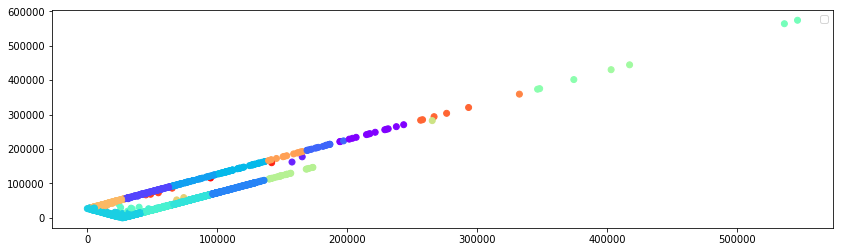

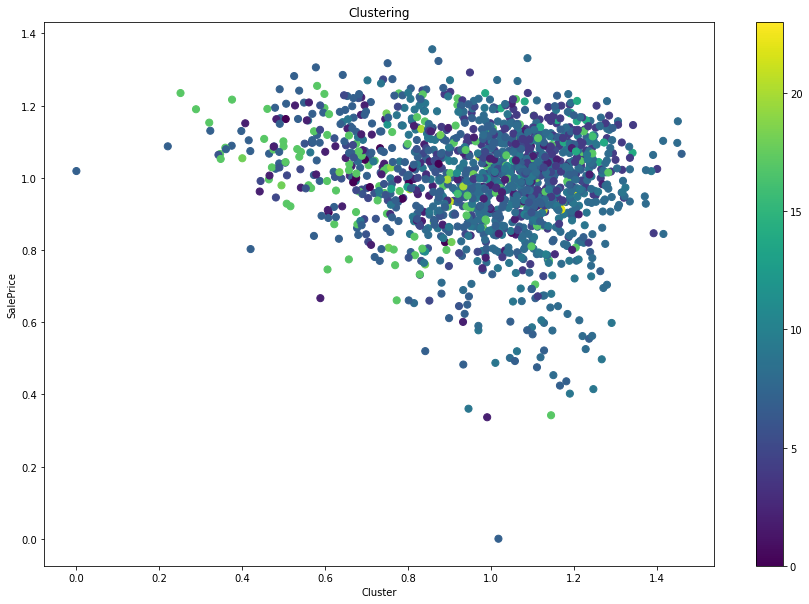

In [0]:
clustering = AgglomerativeClustering(affinity='precomputed',                         
                        linkage='complete', n_clusters=24)
clustering.fit(newdf_euc.values)
Cluster=clustering.labels_
print(type(clustering.labels_))
df = pd.DataFrame(clustering.labels_,columns=['ClusterLabel'])
plt.scatter(newdf_euc.values[:,0],newdf_euc.values[:,1],c=Cluster,cmap='rainbow')
plt.legend()
df.insert(0,'Id',full_df.Id)
##########Cluster based on  normalized data#################
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(newdf_norm.values[:,0],newdf_norm.values[:,1],
                     c=Cluster,s=50)
ax.set_title('Clustering')
ax.set_xlabel('Cluster')
ax.set_ylabel('SalePrice')
plt.colorbar(scatter)

In [0]:
cluster_df=full_df.copy()
cluster_df.insert(0,'cluster',Cluster)
cluster_df.groupby('Neighborhood')['cluster'].unique()

Neighborhood
0                                 [9, 7, 17, 2]
1                                        [9, 8]
2                                        [4, 8]
3                          [8, 14, 4, 7, 9, 17]
4        [17, 7, 1, 21, 8, 23, 22, 9, 10, 2, 6]
5               [7, 17, 5, 9, 8, 3, 2, 4, 6, 0]
6          [8, 9, 17, 2, 7, 6, 4, 5, 10, 18, 3]
7         [4, 8, 9, 2, 7, 14, 10, 17, 6, 16, 5]
8                     [7, 2, 17, 6, 8, 9, 5, 3]
9                              [8, 14, 4, 7, 9]
10                                    [8, 4, 9]
11                          [8, 2, 9, 7, 17, 4]
12                   [9, 8, 7, 4, 2, 17, 10, 6]
13                                       [8, 9]
14                       [7, 2, 17, 9, 4, 8, 5]
15       [2, 5, 0, 6, 18, 3, 17, 11, 13, 7, 20]
16    [6, 2, 5, 7, 18, 0, 17, 3, 9, 12, 20, 13]
17                [8, 4, 9, 7, 20, 5, 6, 2, 14]
18                             [7, 8, 9, 4, 14]
19                             [8, 4, 9, 7, 14]
20                    [9, 8

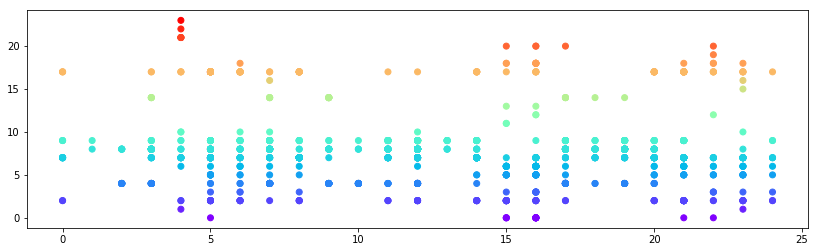

In [0]:
cluster_df.head(10)
plt.scatter(cluster_df.Neighborhood,cluster_df.cluster,c=Cluster,cmap='rainbow')

In [0]:
'''
sample_df=full_df.copy()
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'cosine', linkage = 'complete')
    clust_labels = model.fit_predict(X)
    return (clust_labels)

clust_labels = doAgglomerative(sample_df.values, 20)
agglomerative = pd.DataFrame(clust_labels)
#sample_df.insert((sample_df.shape[1]),'agglomerative',agglomerative)
'''

"\nsample_df=full_df.copy()\ndef doAgglomerative(X, nclust=2):\n    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'cosine', linkage = 'complete')\n    clust_labels = model.fit_predict(X)\n    return (clust_labels)\n\nclust_labels = doAgglomerative(sample_df.values, 20)\nagglomerative = pd.DataFrame(clust_labels)\n#sample_df.insert((sample_df.shape[1]),'agglomerative',agglomerative)\n"

In [0]:
'''
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sample_df.values[:,0],sample_df.values[:,1],
                     c=clust_labels,s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Cluster')
ax.set_ylabel('SalePrice')
plt.colorbar(scatter)
'''

"\nfig = plt.figure()\nax = fig.add_subplot(111)\nscatter = ax.scatter(sample_df.values[:,0],sample_df.values[:,1],\n                     c=clust_labels,s=50)\nax.set_title('Agglomerative Clustering')\nax.set_xlabel('Cluster')\nax.set_ylabel('SalePrice')\nplt.colorbar(scatter)\n"

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.


>It is verified by seeing that the ID's of houses in the same cluster are present in the same Neighborhood,although there are many cases where clustering label is different than the actual Neighborhood.
Also majority of label are clustered in Neighborhood of 4,7,16 and 23 which are the label encoded vaues of Neighborhoods. 
Created 15 clusters for the properties.The properties have been segregated into the clusters as desired.The clusters have been formed through agglomerative algorithm.All the features were normalized and a distance matrix was calculated.It was a pairwise distance between individual housing ID's.The matrix being multidimensional couldn't be fed to the more general algorithms.So ,the agglomerative was used with input as the precomputed distance matrix. It took in all the features of the properties and based on the distance matrix it clustered the properties into same clusters.


> The clustering didn't work as expectd for the normalized data however ,it showed certain distinct clusters when seen in the graph plotted immediately after clustering algorithm.





## Part 6 - Linear Regression

In [0]:
# TODO: code for linear regression

regressor = LinearRegression()
linear_dfFrame=full_df.corr()
cor_target = linear_dfFrame["SalePrice"]
#Selecting highly correlated features
features_upperbound = cor_target[cor_target>0.22]
features_lowerbound = cor_target[cor_target<-0.56]
#Features filtered based on correlation
featuresTobeFiltered=features_upperbound.index.tolist()+features_lowerbound.index.tolist()
newFrameForRegression=full_df.filter(featuresTobeFiltered)
fullTestData_df_filtered=fullTestData_df.filter(featuresTobeFiltered)

y=newFrameForRegression.SalePrice.copy() 
X=newFrameForRegression.drop('SalePrice', axis=1) 
#splitting training data in 70% 30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1) 
#Training the model 
model=regressor.fit(X_train, y_train) 

#prediction the algorithm
y_pred=regressor.predict(X_test)

print('Variance score: %.2f' % regressor.score(X_test, y_test)) 
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Most Important features:",featuresTobeFiltered)
df.head(15)

Variance score: 0.85
85.40942533096619 %
Most Important features: ['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'ExterQual', 'BsmtQual', 'KitchenQual']


,Actual,Predicted
258,231500,219265.139608
267,179500,164754.368412
288,122000,96845.387774
649,84500,69656.656999
1233,142000,142631.790122
167,325624,321268.309968
926,285000,301418.374665
831,151000,158925.954395
1237,195000,222143.115178
426,275000,229370.711487


How well/badly does it work? Which are the most important variables?


> With linear regression model , taking in the most significant features,the variance score is around 85%.Comparing the actual and predicted SalePrice,it is evident that the model has worked done a decent job at estimating the price.
The most important variables have been filtered based on their correlation values with SalePrice ,above 0.25 and below -0.5.

> The variables used here are:
'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish'



> OverallQual is a significant feature in predicting the SalePrice and the variance score is 0.85

## Part 7 - External Dataset

In [0]:
# TODO: code to import external dataset and test
'''extern_df=pd.read_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/housing.csv')

matplotlib.rcParams['figure.figsize'] = (14.0, 4.0)

#extern_df.hist()
extern_df['total_bedrooms']=extern_df['total_bedrooms'].replace(np.nan,-999,regex=True)
plt.hist(extern_df.median_income, density=True, bins=100)
plt.ylabel('Frequency')
plt.xlabel('MSSubclass')
#extern_df.head(10)

original_df.Neighborhood.unique()
'''
#Reading in external data set
extern_df=pd.read_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/cpi_index.csv')
extern_df['Inflation']=extern_df['Inflation'].replace(np.nan,0,regex=True)#replacing nan values
extern_df.head(15)


,Date,Index,Inflation
0,1913-01-01,9.8,0.00
1,1913-02-01,9.8,0.00
2,1913-03-01,9.8,0.00
3,1913-04-01,9.8,0.00
4,1913-05-01,9.7,-1.02
5,1913-06-01,9.8,1.03
6,1913-07-01,9.9,1.02
7,1913-08-01,9.9,0.00
8,1913-09-01,10.0,1.01
9,1913-10-01,10.0,0.00


In [0]:

#Changing object type to DateTime
extern_df['Date'] = pd.to_datetime(extern_df['Date'])
extern_df['YrSold']= extern_df['Date'].dt.year
#caluclating mean cpi for each year
cpi_df=pd.DataFrame(extern_df.groupby(['YrSold'])['Inflation'].mean().reset_index()) 
cpi_df.head()

,YrSold,Inflation
0,1913,0.170833
1,1914,0.087500
2,1915,0.165833
3,1916,0.995833
4,1917,1.406667


In [0]:
test_df=full_df.copy()
#joining the two data frames
test_df1=test_df.merge(cpi_df, on="YrSold",how='left')
#mutiplying the Inflation Adjustment Factor to the sale price
test_df1['newSalePrice'] = test_df1['SalePrice']*(1+((test_df1['Inflation'])/100)) 
df = pd.DataFrame({'Actual salePrice': test_df1.SalePrice, 'New Estimate': test_df1.newSalePrice})
df.head()

,Actual salePrice,New Estimate
0,208500,208526.062500
1,181500,182106.512500
2,223500,223527.937500
3,140000,140295.166667
4,250000,250031.250000


Describe the dataset and whether this data helps with prediction.


> The data set is taken from the CPI which takes into acount the month wise inflation over period of years.Tha dataset has Date as object type ,Index  and Inflation over the date period.The inflation values can be used to estimate the inflation adjusted salePrice of each property using the inflation value provided over the period of it being sold.The inflation is used to calculate Inflation Adjustment Factor and is multiplied to get the new estimated salePrice.This additional feature is gonna improve the predictions as we get much more realistic,uniform (inflation adjusted) and upto date salePrice for the properties.



## Part 8 - Permutation Test

Pvalue of  MiscVal 0.004345684959996081
score -0.001852640250886976
pval with  permutations  MiscVal 0.24752475247524752


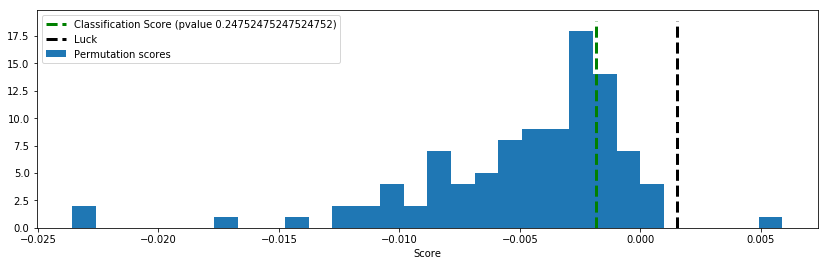

Pvalue of  Condition2 0.0
score -0.002381386471340822
pval with  permutations  Condition2 0.38613861386138615


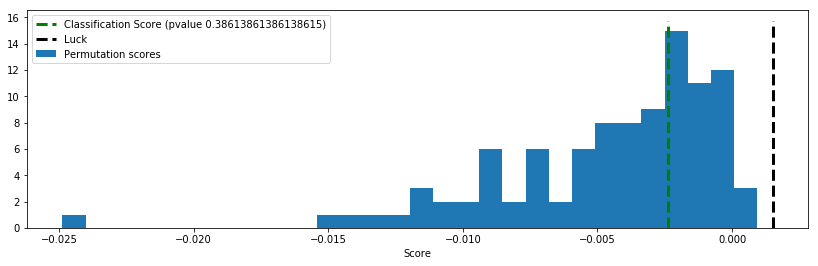

Pvalue of  Utilities 0.3259583026997034
score -0.0014111899018041847
pval with  permutations  Utilities 0.4158415841584158


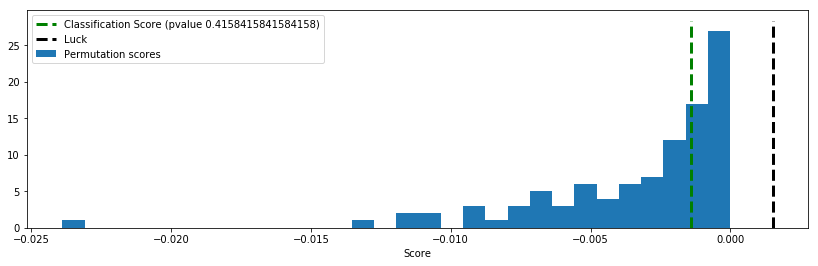

Pvalue of  PoolArea 0.044714674557400295
score -0.00042972050211446494
pval with  permutations  PoolArea 0.1188118811881188


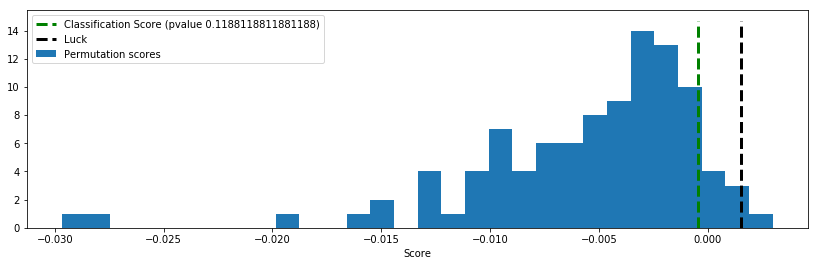

Pvalue of  LotShape 2.0708127269260994e-228
score 0.06188046439463194
pval with  permutations  LotShape 0.009900990099009901


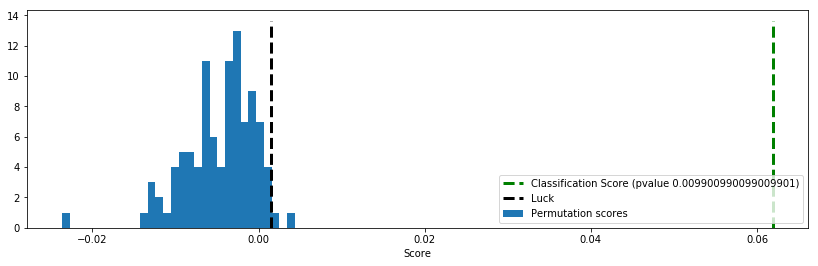

Pvalue of  Foundation 0.0
score 0.14375908072401536
pval with  permutations  Foundation 0.009900990099009901


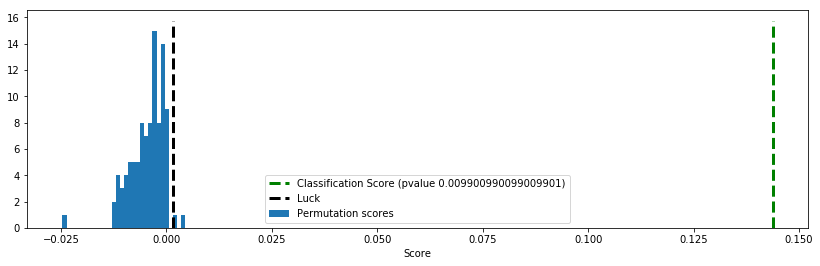

Pvalue of  BsmtFinSF1 5.813892748728731e-155
score 0.14807039287406376
pval with  permutations  BsmtFinSF1 0.009900990099009901


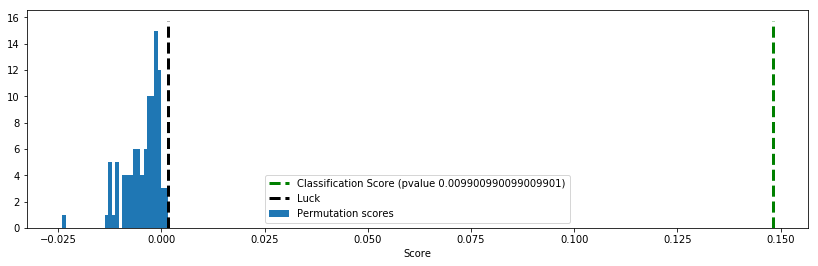

Pvalue of  TotalBsmtSF 0.0
score 0.3663101537390811
pval with  permutations  TotalBsmtSF 0.009900990099009901


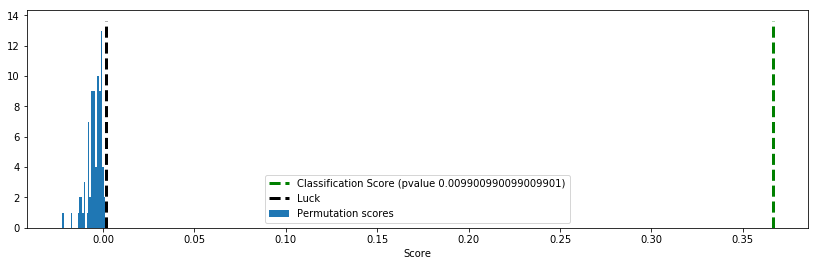

Pvalue of  GarageFinish 2.4255459803925768e-242
score 0.3012415682720105
pval with  permutations  GarageFinish 0.009900990099009901


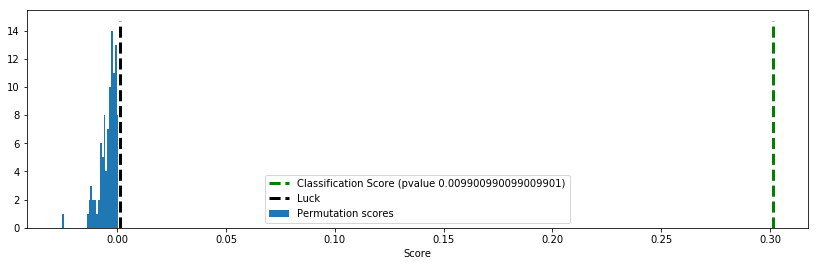

Pvalue of  OverallQual 0.0
score 0.6247257478644835
pval with  permutations  OverallQual 0.009900990099009901


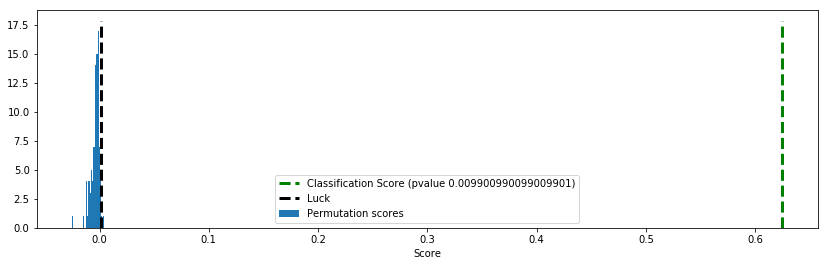

Pvalue of  CentralAir 0.0
score 0.06180606790116409
pval with  permutations  CentralAir 0.009900990099009901


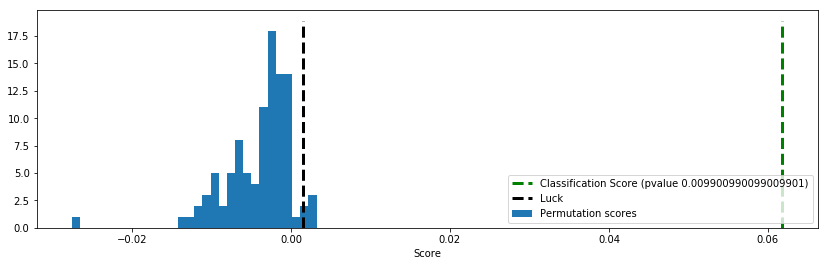

Pvalue of  TotRmsAbvGrd 0.0
score 0.27550940403528545
pval with  permutations  TotRmsAbvGrd 0.009900990099009901


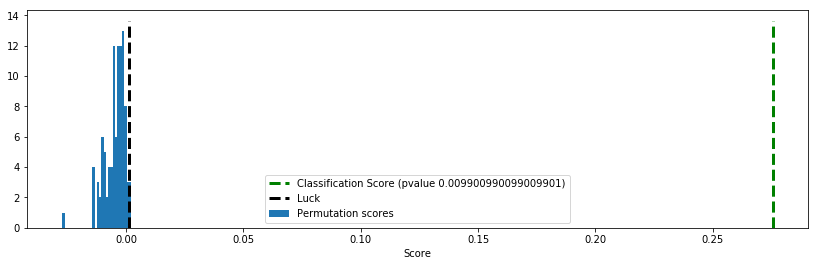

Pvalue of  ExterQual 0.0
score 0.4030940352230477
pval with  permutations  ExterQual 0.009900990099009901


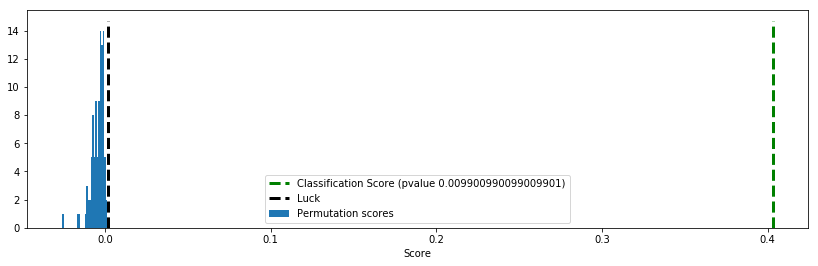

Pvalue of  SaleCondition 0.0
score 0.037661224148268745
pval with  permutations  SaleCondition 0.009900990099009901


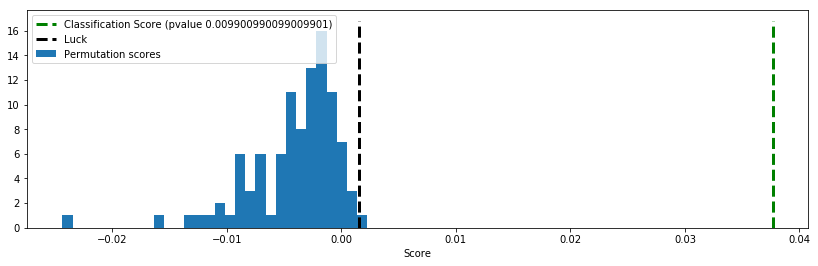

Pvalue of  LotArea 2.954255285114589e-164
score -0.011150790595738242
pval with  permutations  LotArea 0.9108910891089109


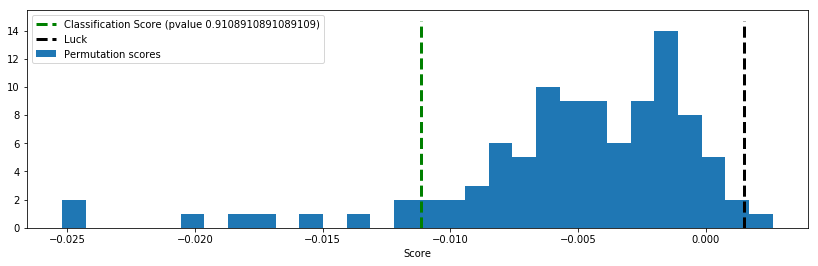

In [0]:
# TODO: code for all permutation tests
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr= SVR(kernel='linear')
originaldf_copy=full_df.copy()
y_trgfeature = np.log(originaldf_copy["SalePrice"])
tendifferent_variables=['MiscVal','Condition2','Utilities','PoolArea','LotShape','Foundation','BsmtFinSF1','TotalBsmtSF','GarageFinish','OverallQual','CentralAir','TotRmsAbvGrd','ExterQual','SaleCondition','LotArea']
for eachFeature in tendifferent_variables:
  X_indfeature=originaldf_copy.filter([eachFeature])
  #splitting training data in 70% 30% ratio
  X_train, X_test, y_train, y_test = train_test_split(X_indfeature, y_trgfeature, test_size=0.3,random_state=1) 
  model = sm.OLS(y_train, X_train).fit()
  predictions = model.predict(X_test) # make the predictions by the model

  #  permutation  tests 
  print("Pvalue of ",eachFeature,model.pvalues[0])

  #permutation score 
  target=originaldf_copy["SalePrice"]
  xx=X_indfeature
  xx.to_numpy()
  target.to_numpy()
  score, permutation_scores, pvalue = permutation_test_score(
        regressor, xx, target,cv=3,n_permutations=100, n_jobs=-1)
  print("score",score)
  print("pval with  permutations ",eachFeature,pvalue)
  #print("permutation",permutation_scores)
  ############Plots########################
  plt.hist(permutation_scores, 30, label='Permutation scores')
  ylim = plt.ylim()
  plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
  classes_n = np.unique(target).size
  plt.plot(2 * [1. / classes_n], ylim, '--k', linewidth=3, label='Luck')
  #plt.ylim(ylim)
  plt.legend()
  plt.xlabel('Score')
  plt.show()

Describe the results.


> Seeing the permutation results for chosen ten variables ,it can be seen that feature "MiscVal" has p-value above 0.05, 0.0079 to be exact and thus can be considered insignificant for our distribution.A pvalue under 0.05 is considered statically significant,that is there is lesser chance that it happened by chance.Single variable regression is done and pvalues are received after 100 permuations on the outcome.The more the value tends towards zero ,the better the significance is of that particular feature for the regression model.



## Part 9 - Final Result

In [0]:
#finaltraindata_df=full_df.copy()
y=newFrameForRegression.SalePrice.copy() 
X=newFrameForRegression.drop('SalePrice', axis=1) 
#splitting training data in 70% 30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1) 
#Training the model 
model=regressor.fit(X_train, y_train) 
y_pred=regressor.predict(X_test)
print('Variance score: %.2f' % regressor.score(X_test, y_test)) 
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')
#Prdeicting for actual test Data already read in.  
final_prediction=regressor.predict(fullTestData_df_filtered) 

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

#Output the predicted isFraud values in csv file with TransactionID 
out=pd.DataFrame(final_prediction,fullTestData_df.Id,['SalePrice']) 
out.to_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/out.csv') 

Variance score: 0.85
85.40942533096619 %
Mean squared error: 1041811214.94
Test Variance score: 0.85




> Using linear regression we got variance of 0.85 for this data.So i used Gradient boost which does cascading boosting and results in much better variance score of 0.92 as seen from the output below.



In [0]:

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(X_train, y_train)
y_pred=gradient_boosting_regressor.predict(X_test)
print('Variance score: %.2f' % gradient_boosting_regressor.score(X_test, y_test)) 
accuracy = gradient_boosting_regressor.score(X_test,y_test)
print(accuracy*100,'%')
final_prediction_withBoost=regressor.predict(fullTestData_df_filtered) 

Variance score: 0.92
91.78418302363008 %


In [0]:
out=pd.DataFrame(final_prediction_withBoost,fullTestData_df.Id,['SalePrice']) 
out.to_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/out_boost.csv') 

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

y=full_df.SalePrice.copy() 
X=full_df.drop('SalePrice', axis=1) 
#splitting training data in 70% 30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1) 

regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(fullTestData_df)
print('Variance score: %.2f' % regressor.score(X_test, y_test)) 

out=pd.DataFrame(y_pred,fullTestData_df.Id,['SalePrice']) 
out.to_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/out_random1.csv')

Variance score: 0.91


In [0]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1
                                       )
newFrameForRegression=full_df.filter(featuresTobeFiltered)
fullTestData_df_filtered=fullTestData_df.filter(featuresTobeFiltered)
#LGBMRegressor
y=newFrameForRegression.SalePrice.copy() 
X=newFrameForRegression.drop('SalePrice', axis=1) 
lightgbm.fit(X, y)
preds_lightgbm = lightgbm.predict(fullTestData_df_filtered)
out_lightgbm = pd.DataFrame(preds_lightgbm, fullTestData_df.Id,['SalePrice'])
out_lightgbm.to_csv('/content/drives/My Drive/DataScience/HomeWork3/Data/out_lgbm1.csv')